## Язык Python для анализа данных

# Лекция 5

## Визуализация с помощью библиотеки `Seaborn`

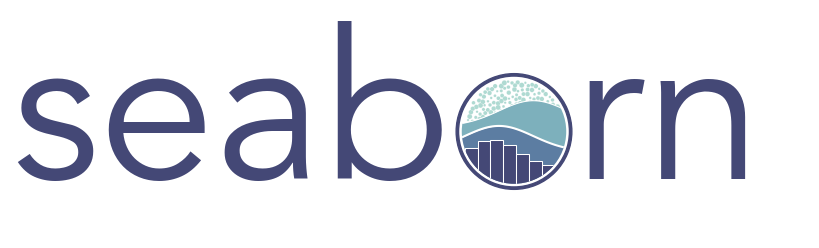



[Seaborn](https://seaborn.pydata.org/) —  библиотека для предоставления высокоуровневых команд для создания множества различных типов графиков, удобных для исследования статистических данных и для подгонки статистических моделей, написанная на бэкенде `matplotlib`.

Основные причины применения именно библиотеки `seaborn` в анализе данных:
1. `matplotlib` была выпущена на десятилетие раньше, чем библиотека `pandas`, и поэтому не ориентирована на работу с объектами `DataFrame`.  `seaborn` интеллектуально использует метки `DataFrame` на графиках.
2. Выразительный высокоуровневый интерфейс: построение большинства простых графиков происходит в одну строчку кода.
3. Более эстетичные графики: часто встроенные в `seaborn` стили достаточно хороши и без вашего вмешательства.

Автор seaborn — Michael Waskom, PhD, сотрудник Center for Neural Research (Нью-Йорк), выпускник Стэнфорда. Разработка seaborn — это его хобби, которое делает жизни тысяч людей чуть лучше.

**Малоизвестный факт:** библиотека названа в честь [Сэмюела Нормана Сиборна](https://en.wikipedia.org/wiki/Sam_Seaborn) (S.N.S. — именно поэтому `import seaborn as sns`), героя сериала [The West Wing](https://en.wikipedia.org/wiki/The_West_Wing), "одного из самых важных телесериалов в истории" по версии журнала Times. Таким образом автор отдал дань уважения любимому сериалу.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Начнём с простого: рассмотрим отрисовку нескольких траекторий синусов при помощи matplotlib и улучшим её с помощью seaborn.

In [ ]:
def sinplot(flip=1):
    x = np.linspace(-10, 10, 100)
    for i in range(1, 5):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

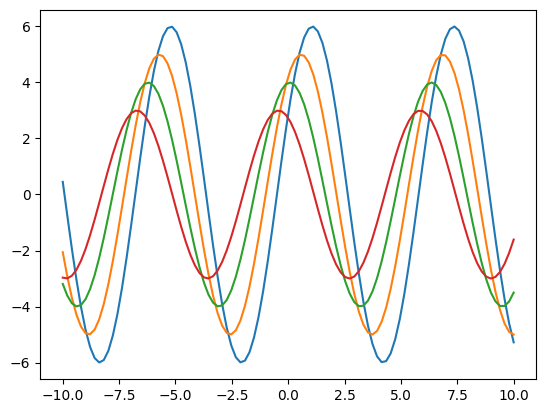

In [ ]:
sinplot()

### 2. Основные параметры

#### 2.1. Стили

Установка эстетических параметров графиков:

`sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)`

* `context` &mdash; параметры контекста, влияет на размер меток, линий и других элементов, но не на общий стиль. Контекст: `notebook`, `paper`, `talk`, `poster`;
* `style` &mdash; стиль осей: `darkgrid` (серый фон с сеткой), `whitegrid` (белый фон с сеткой), `dark` (серый фон без сетки), `white`  (белый фон без сетки), `ticks`;
* `palette` &mdash; цветовая палитра: `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`, а также палитры из `matplotlib`;
* `font` &mdash; шрифт текста;
* `font_scale` &mdash; масштабирование размера текста.

Посмотрим вид графиков для разных контекстов:

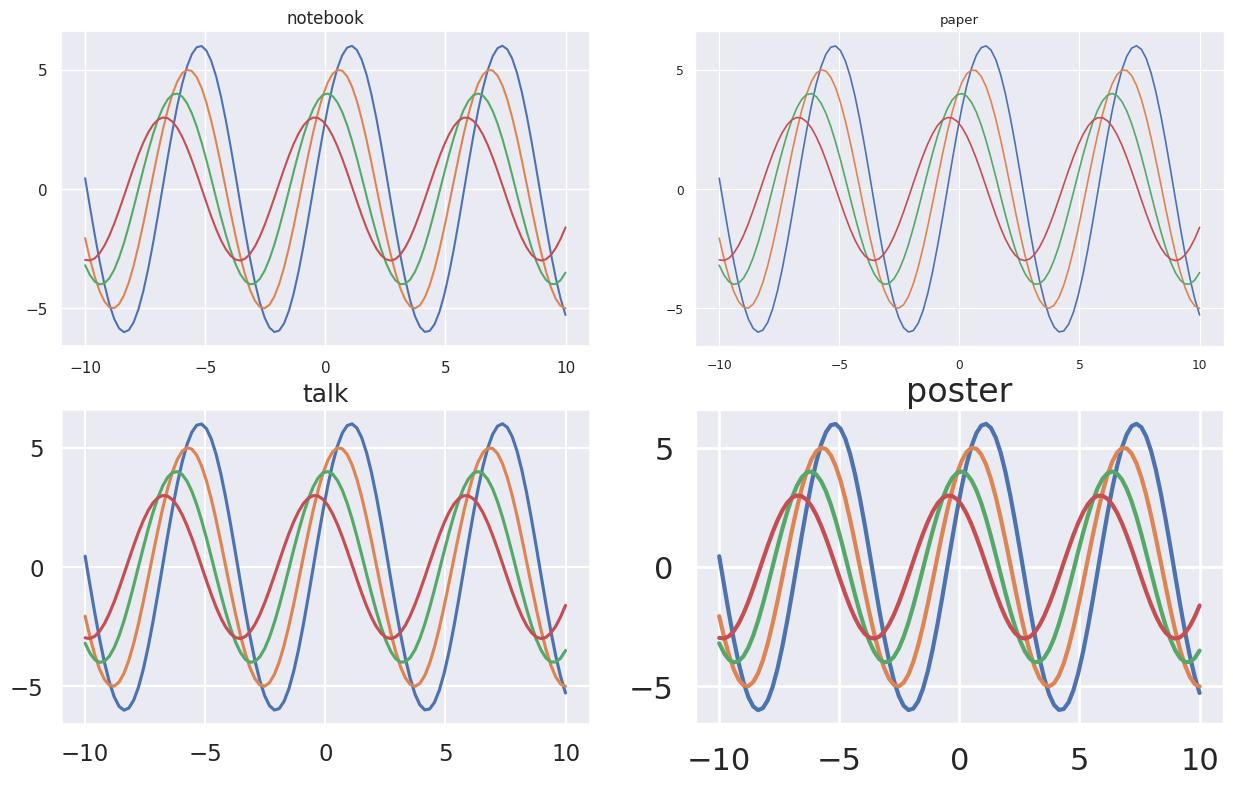

In [ ]:
plt.figure(figsize=(15, 9))
for i, context in enumerate(['notebook', 'paper',
                             'talk', 'poster']):
    sns.set(context=context)  # Устанавливаем контекст
    plt.subplot(2, 2, i+1)
    sinplot()
    plt.title(context)

Вид графиков в разных стилях.

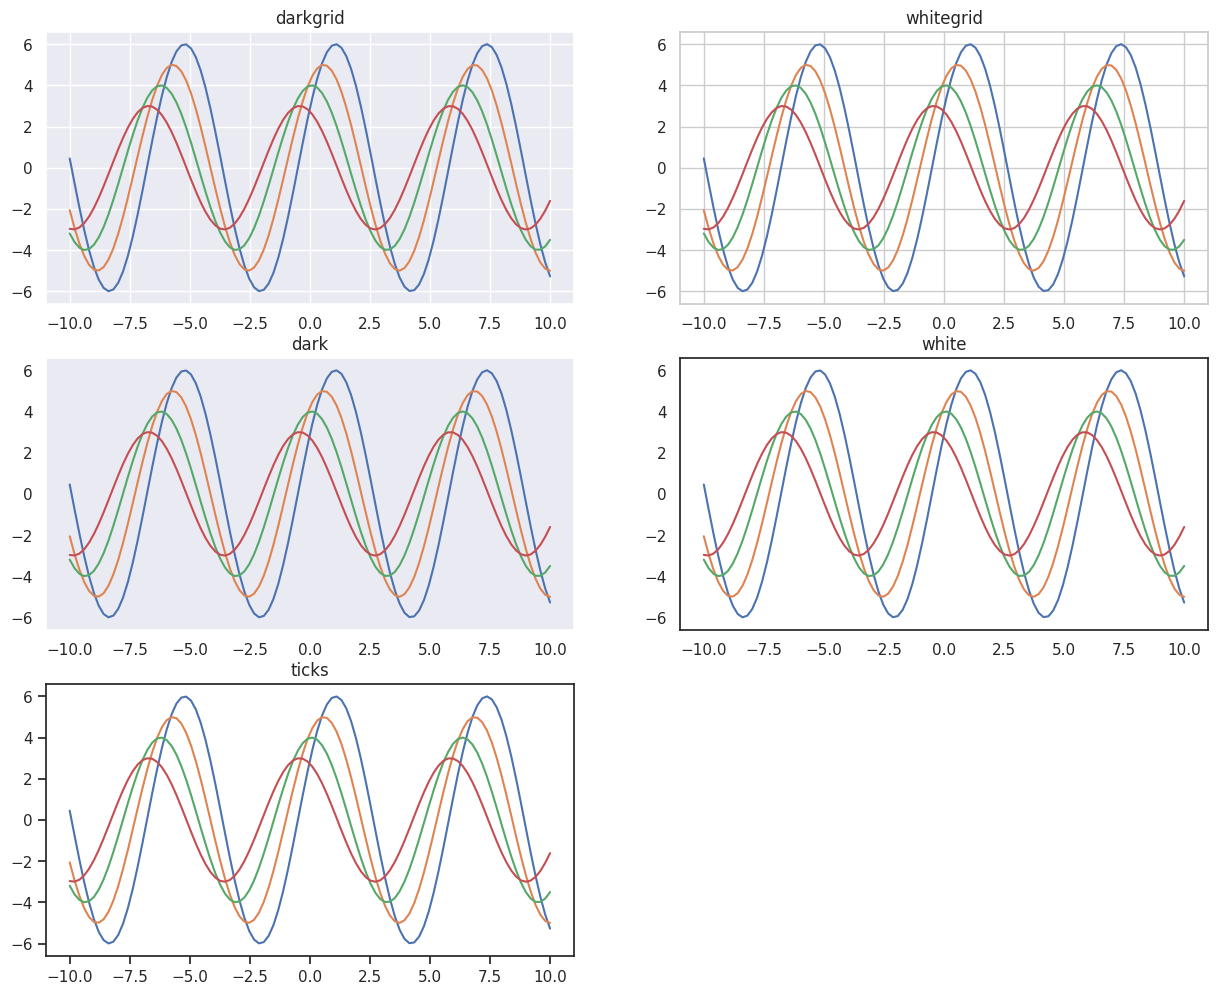

In [ ]:
plt.figure(figsize=(15, 12))
for i, style in enumerate(['darkgrid', 'whitegrid',
                           'dark', 'white', 'ticks']):
    sns.set(style=style)  # Устанавливаем стиль
    plt.subplot(3, 2, i+1)
    sinplot()
    plt.title(style)

В `seaborn` можно убрать рамку вокруг картинки, причём любую из четырёх сторон.

`sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)`
* `fig` &mdash; фигура `matplotlib`. Если `None`, то текущая;
* `top`, `right`, `left`, `bottom` &mdash; указатели границ. Левую и нижнюю оставляют, т.к. вдоль них расположены метки на координатных осях.

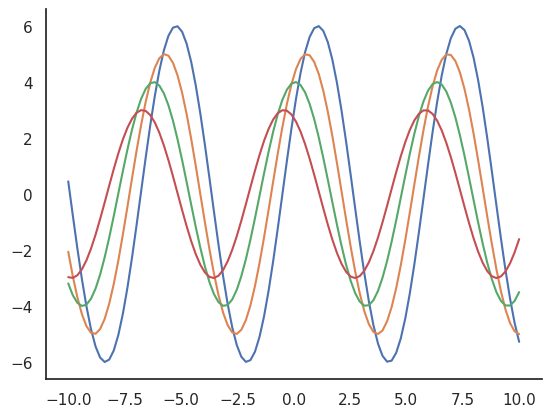

In [ ]:
sns.set(style='white')
sinplot()
sns.despine()

Большой недостаток подхода выше — использование `sns.set`.  Дело в том, что эта функция меняет глобальные переменные: все последующие графики отрисовываются в том же стиле.  Иногда это уместно: можно один раз вызвать `sns.set` в самом начале ноутбука и получить стилизованные графики с минимумом усилий. Во всех остальных ситуациях нужно использовать контекстные менеджеры `sns.plotting_context` и `sns.axes_style` вместо `sns.set`.

In [ ]:
sns.set()

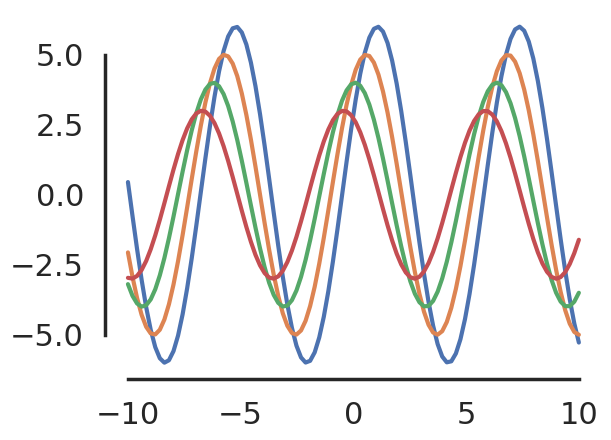

In [ ]:
with sns.plotting_context("poster"), sns.axes_style("white"):
    sinplot()
    sns.despine(trim=True)

#### 2.2. Цвета

Используемую палитру можно визуализировать с помощью функции `sns.palplot`. Палитры делятся на несколько следующих типов.

##### Последовательные (sequential)

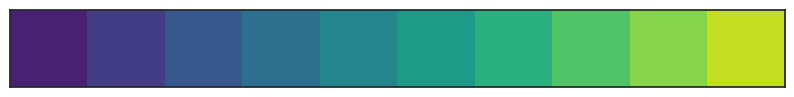

In [ ]:
sns.palplot(sns.color_palette('viridis', n_colors=10))

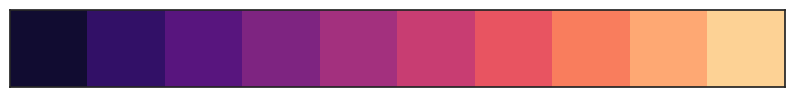

In [ ]:
sns.palplot(sns.color_palette('magma', n_colors=10))

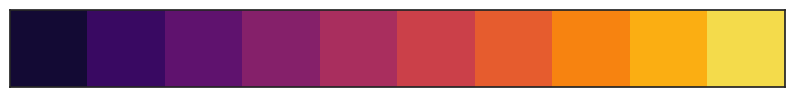

In [ ]:
sns.palplot(sns.color_palette('inferno', n_colors=10))

Здесь стоит сделать отступление, т.к. именно с этим типом палитр люди сталкиваются чаще всего. Стандартные последовательные палитры в seaborn — `viridis`, `inferno`, `magma` и другие — хороши плавным изменением интенсивности цвета. Они не искажают восприятие и подходят в том числе для дальтоников. О том, как индустрия пришла к своим палитрам, можно узнать в [видеолекции с SciPy 2015](https://www.youtube.com/watch?list=PLYx7XA2nY5Gcpabmu61kKcToLz0FapmHu&v=xAoljeRJ3lU) — ежегодной всемирной конференции энтузиастов библиотеки `scipy`.

##### Расходящиеся (diverging)

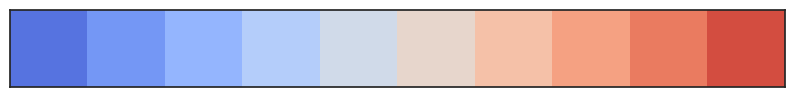

In [ ]:
sns.palplot(sns.color_palette('coolwarm', n_colors=10))

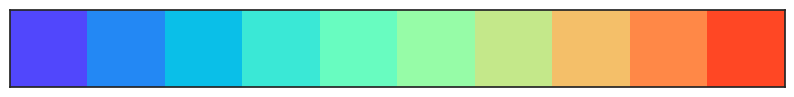

In [ ]:
sns.palplot(sns.color_palette('rainbow', n_colors=10))

В прошлом большой популярностью пользовалась палитра `jet`, очень похожая на `rainbow`. Более того, долгое время это была палитра по умолчанию в matplotlib. Тем не менее, от `jet` отказались: выяснилось, что она искажает восприятие картинки из-за неравномерной интенсивности отдельных цветов палитры. Есть [интересная статья](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/), в которой подробно поясняются причины такого решения.

Забавный факт: даже если просто попытаться отрисовать её, seaborn скажет безапелляционное "нет".

In [ ]:
sns.palplot(sns.color_palette('jet', n_colors=10))

ValueError: No.

##### Категориальные (qualitative)

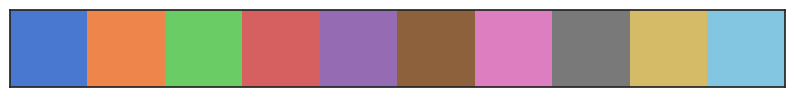

In [ ]:
sns.palplot(sns.color_palette('muted', n_colors=10))

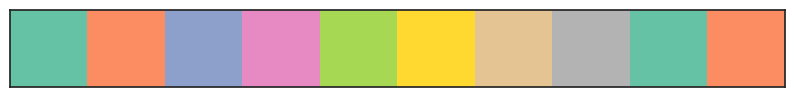

In [ ]:
sns.palplot(sns.color_palette('Set2', n_colors=10))

##### Пользовательские

В seaborn можно сделать свою палитру: либо на основании имеющихся, либо совсем с нуля.  Для примера, сделаем палитру из десяти оттенков оранжевого.

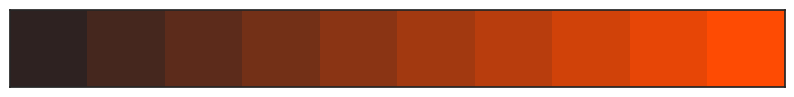

In [ ]:
sns.palplot(sns.dark_palette("xkcd:blood orange", n_colors=10))

 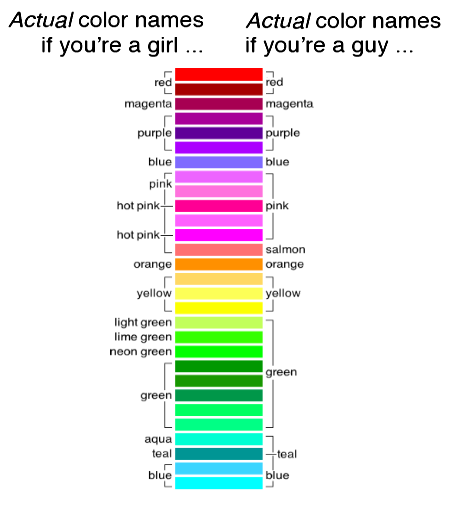В 2010 году популярный онлайн-комикс [xkcd](https://xkcd.com/) провёл [соцопрос](https://blog.xkcd.com/2010/05/03/color-survey-results/), по результатам которого подобрал названия для [954 самых используемых RGB-цветов](https://xkcd.com/color/rgb/). Это упрощает жизнь огромному количеству людей, от дизайнеров до аналитиков и учёных.

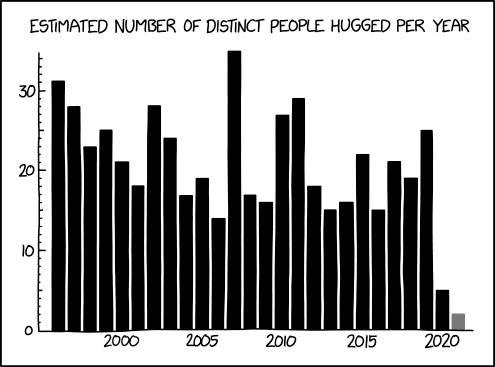

Больше о палитрах можно прочитать в [официальной документации](https://seaborn.pydata.org/tutorial/color_palettes.html).

---

Теперь можно перейти и к более практичным примерам. Рассмотрим основные типы графиков, с которыми люди сталкиваются при анализе данных.

### 3. Оценки плотности

Вместо гистограмм можно строить гладкие аппроксимакции распределения путем ядерной оценки плотности распределния.

## Recap стат. анализ
Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из непрерывного распределения.
Выберем
* $q(x)$ &mdash; некоторая "базовая" плотность, называемая **ядром**. Чаще всего в качестве ядра рассматривают плотность нормального распределения $\mathcal{N}(0, I_n)$.
* $h > 0$ &mdash; величина, отвечающая за масштабирование ядра, называемая **шириной ядра**.

Тогда **ядерной оценкой плотности** (kernel density estimation, KDE) по выборке $X$ называется плотность
$$\widehat{p}_h(x) = \frac{1}{nh}\sum_{i=1}^n q\left(\frac{x-X_i}{h}\right).$$

**Смысл:** в каждую точку выборки поставили отмасштабированное ядро так, будто эта точка — центр ядра, а затем усреднили значения соседних точек с весами, заданными этим ядром. Вместо тысячи слов — [интерактивная иллюстрация](https://mathisonian.github.io/kde/).

Ядерные оценки плотности — KDE, Kernel Density Estimates — способ что-то понять о распределении, когда неизвестно ничего. Такого рода методы называют **непараметрическими**, они иллюстрируют разницу подходов в статистике и теории вероятностей: если в теории вероятности известно распределение и исследуются его свойства, то в статистике зачастую известны только данные, и по их свойствам угадывается распределение.

--------------------

#### Функция `sns.kdeplot`

Построение и отрисовка KDE

```python
sns.kdeplot(
    data=iris,                     # DataFrame, из которого берутся данные
    x="sepal_length",              # Столбец для оси X (обязательно для 1D/2D)
    y=None,                        # Столбец для оси Y (если задан — 2D KDE)
    
    hue="species",                 # Группировка по категориальной переменной (например, вид ириса)
    weights=None,                  # Веса наблюдений (массив той же длины, что и данные; редко используется)
    
    palette="Set1",                # Цветовая палитра для групп из `hue` (можно словарь: {"setosa": "blue", ...})
    hue_order=["setosa", "versicolor", "virginica"],  # Порядок отображения категорий в легенде
    hue_norm=None,                 # Нормализация цветов для `hue` (обычно не требуется для категорий)
    
    color=None,                    # Цвет, если НЕТ `hue` (игнорируется, если задан `hue`)
    fill=True,                     # Закрашивать области под KDE (в 1D) или между контурами (в 2D)
    
    multiple="layer",              # Как отображать несколько KDE при `hue`:
                                   #   "layer" — накладываются друг на друга (по умолчанию),
                                   #   "stack" — стекаются,
                                   #   "fill" — нормируются на 100% (как stacked density)
    common_norm=True,              # Общая нормировка плотности для всех групп (если False — каждая группа нормируется отдельно)
    common_grid=False,             # Использовать общую сетку для всех групп (полезно при сравнении)
    
    levels=10,                     # Число уровней плотности (только в 2D); можно передать список: [0.1, 0.3, 0.5]
    thresh=0.05,                   # Минимальный уровень плотности для отображения (в долях от максимума; 0.05 = 5%)
    
    bw_method="scott",             # Метод выбора ширины ядра: "scott", "silverman" или число (например, 0.5)
    bw_adjust=1.0,                 # Множитель для ширины ядра: >1 — сглаживает, <1 — делает острее
    
    log_scale=None,                # Логарифмический масштаб: None, True, (True, False) и т.д.
    
    legend=True,                   # Отображать ли легенду (по умолчанию — да, если есть `hue`)
    
    cbar=False,                    # Показывать цветовую шкалу (только в 2D)
    cbar_ax=None,                  # Оси для цветовой шкалы (если нужно разместить отдельно)
    cbar_kws=None,                 # Доп. параметры для цветовой шкалы, например: {"label": "Плотность"}
    
    ax=None,                       # Оси matplotlib, на которых рисовать (если None — создаются новые)
    
    alpha=0.6,                     # Пример параметра из **kwargs → прозрачность
    linewidth=1.5                  # Толщина линий контуров (в 2D) или кривой (в 1D)
)
```

------------------

Пример `distplot` для всех четырех типов графиков для выборки из нормального распределения. В качестве параметрического семейства распределений использованы все нормальные распределения. Плотность, соответствующая ОМП, нарисована черным цветом.

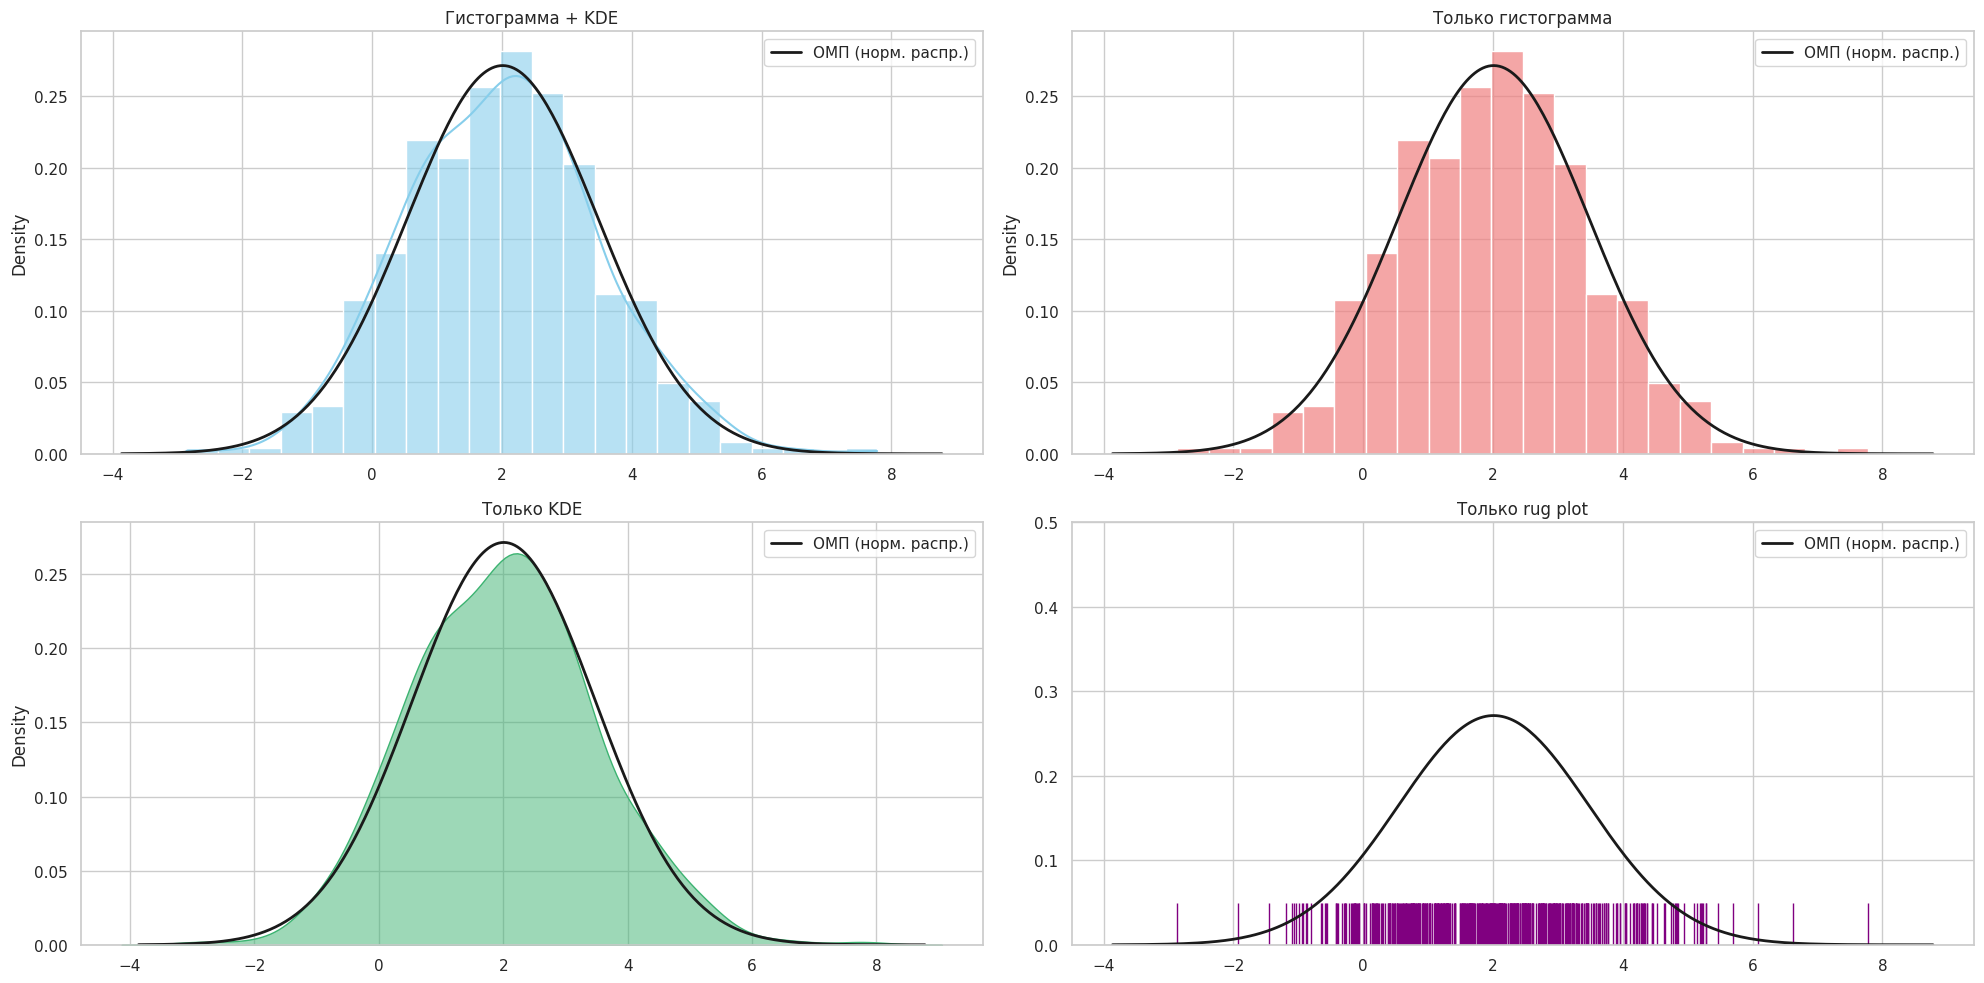

In [ ]:
# Устанавливаем стиль
sns.set(style="whitegrid")

# Генерируем выборку из нормального распределения
np.random.seed(42)
x = np.random.normal(loc=2.0, scale=1.5, size=500)  # истинные параметры: μ=2, σ=1.5

# ОМП для нормального распределения
mu_mle = np.mean(x)
sigma_mle = np.std(x, ddof=0)  # MLE использует ddof=0 (не исправленная дисперсия)

# Создаём 2x2 сетку графиков
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

# 1. Гистограмма + KDE
sns.histplot(x, stat='density', kde=True, color='skyblue', alpha=0.6, ax=axes[0])
axes[0].set_title('Гистограмма + KDE')

# 2. Только гистограмма
sns.histplot(x, stat='density', kde=False, color='lightcoral', alpha=0.7, ax=axes[1])
axes[1].set_title('Только гистограмма')

# 3. Только KDE
sns.kdeplot(x, color='mediumseagreen', fill=True, alpha=0.5, ax=axes[2])
axes[2].set_title('Только KDE')

# 4. Только rug plot
sns.rugplot(x, height=0.1, color='purple', ax=axes[3])
axes[3].set_ylim(0, 0.5)
axes[3].set_title('Только rug plot')

# На всех графиках добавляем плотность ОМП (чёрная линия)
x_grid = np.linspace(x.min() - 1, x.max() + 1, 300)
pdf_mle = sps.norm.pdf(x_grid, loc=mu_mle, scale=sigma_mle)

for ax in axes:
    ax.plot(x_grid, pdf_mle, 'k-', linewidth=2, label='ОМП (норм. распр.)')
    ax.legend()

plt.tight_layout()
plt.show()

*Примечание* ОМП для нормального распределения: не несмещённая оценка (используется ddof=0 в np.std), так как именно она максимизирует правдоподобие.
Чёрная линия — теоретическая плотность с этими оценёнными параметрами.
Все графики используют stat='density', чтобы гистограмма и KDE были в шкале плотности (а не частот).


Многомерная оценка плотности.

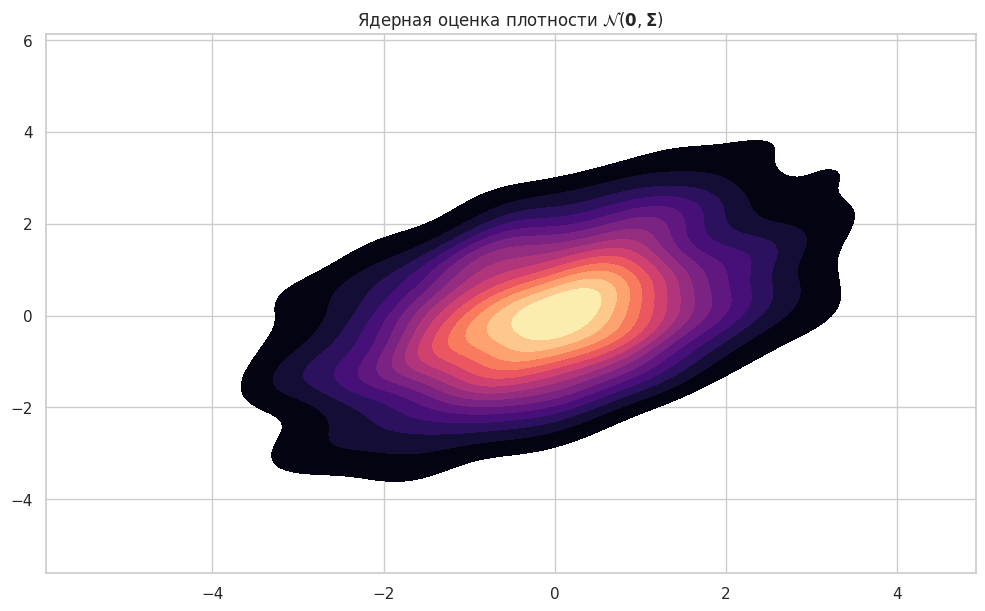

In [ ]:
# Генерируем двумерную выборку из нормального распределения
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=1000).T

# Строим ядерную оценку плотности
plt.figure(figsize=(12, 7))
plt.title(r"Ядерная оценка плотности $\mathcal{N}(\mathbf{0}, \mathbf{\Sigma})$")
sns.kdeplot(x=x, y=y, levels=15, fill=True, cmap="magma")
plt.show()

#### Ирисы Фишера

Снова загрузим датасет Ирисы Фишера, который встроен в seaborn. Напоминаю, числовые столбцы отвечают за длину и ширину наружной и внутренней доли околоцветника для трех сортов ириса: setosa, virginica, versicolor.

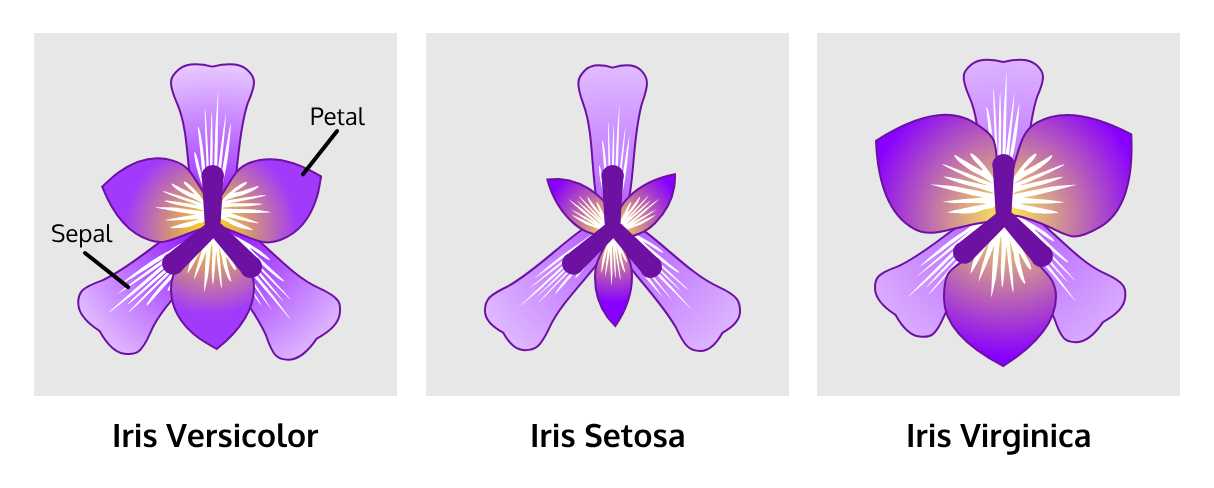

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Выделим отдельные таблицы под каждый тип цветка.

Построим для них ядерную оценку плотности.

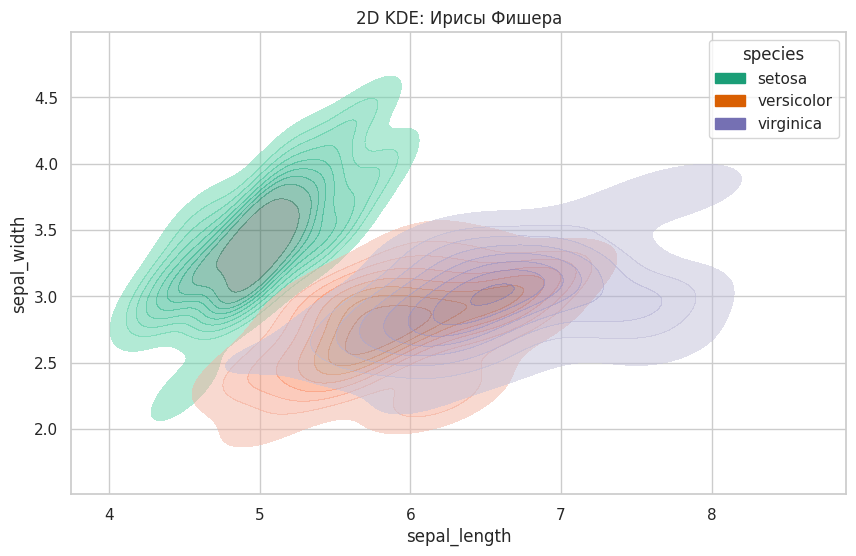

In [ ]:
# Один вызов kdeplot с hue
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=iris,
    x='sepal_length', y='sepal_width',
    hue='species',
    fill=True,
    alpha=0.5,
    levels=10,
    palette="Dark2",
)
plt.title("2D KDE: Ирисы Фишера")
plt.show()

Грамотный исследовательский анализ данных — Exploratory Data Analysis, EDA — это залог правильного выбора модели машинного обучения. По графику видно, что два вида в этом признаковом пространстве разделяются прямой линией. Т.е. вид цветка можно определить по значениям признаков `sepal_width` и `sepal_length`.  

Значит, для классификации цветков можно использовать т.н. *обобщённо-линейные модели* — а именно, т.н. *логистическую регрессию*.

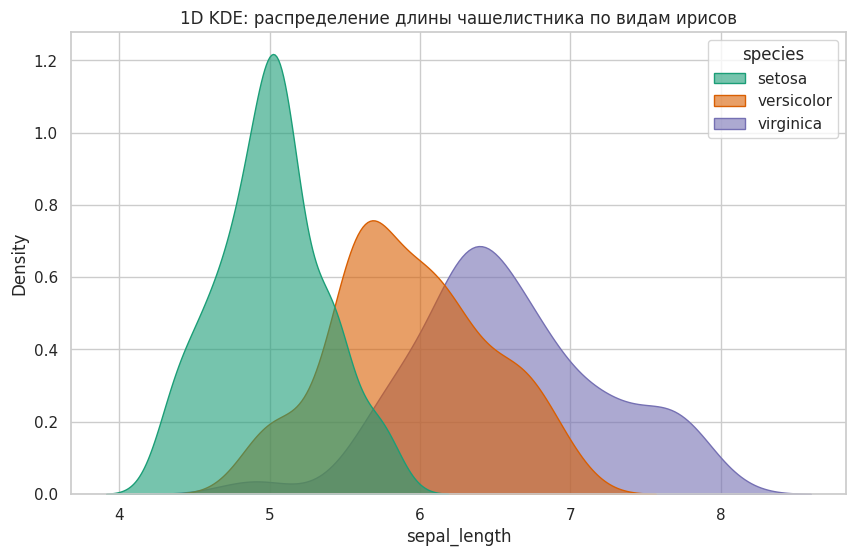

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=iris,
    x="sepal_length",
    hue="species",
    fill=True,
    alpha=0.6,
    palette="Dark2",
    bw_adjust=0.8,          # немного уменьшаем сглаживание
    common_norm=False,      # каждая группа нормируется отдельно (лучше для сравнения форм)
    legend=True
)
plt.title("1D KDE: распределение длины чашелистника по видам ирисов")
plt.show()

### 4. Box plot

Box plot &mdash;

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

```python

sns.boxplot(
    data=tips,                     # DataFrame с данными в "длинном" формате
    
    x="day",                       # Категориальная переменная по оси X (например, день недели)
    y="total_bill",                # Числовая переменная по оси Y (например, сумма счёта)
    hue="sex",                     # Дополнительная группировка внутри каждой категории (например, пол)
    
    order=["Thur", "Fri", "Sat", "Sun"],  # Порядок отображения категорий по оси X
    hue_order=["Male", "Female"],         # Порядок уровней внутри hue
    
    orient="v",                    # Ориентация: "v" — вертикально (по умолчанию), "h" — горизонтально
    
    color=None,                    # Цвет всех ящиков (игнорируется, если задан hue)
    palette="Set1",                # Цветовая палитра для групп (можно "deep", "muted", или словарь)
    saturation=0.75,               # Насыщенность цвета (0–1): 1 — полная, 0 — серый
    
    width=0.8,                     # Ширина ящиков (от 0 до 1)
    dodge=True,                    # Если True и есть hue — ящики смещаются бок о бок
    
    fliersize=4,                   # Размер точек-выбросов
    linewidth=None,                # Толщина линий контуров ящиков (None — автоматически)
    
    whis=1.5,                      # Коэффициент для определения выбросов:
                                   #   по умолчанию: [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
                                   #   можно передать процентили: whis=(5, 95)
    
    notch=True,                    # Добавить "выемку" вокруг медианы (доверительный интервал)
                                   # Полезно для сравнения медиан: если выемки не перекрываются — различие может быть значимым
    
    ax=None,                       # Оси matplotlib (None — использовать текущие или создать новые)
    
    # Дополнительные аргументы для matplotlib (пример):
    # showfliers=False,           # Скрыть выбросы (передаётся через **kwargs)
)


```

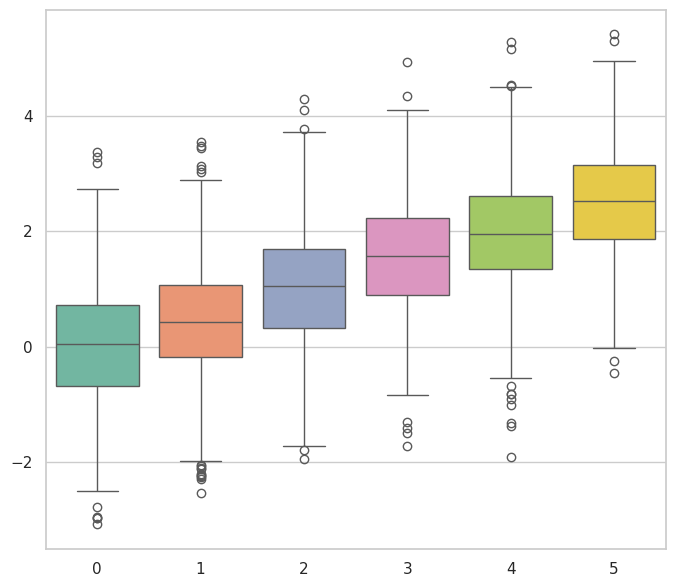

In [ ]:
data = sps.norm.rvs(size=(1000, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.boxplot(data=data, palette='Set2');

Загрузим датасет `tips`, который встроен в seaborn. Изначально датасет составлен официантом, который записывал информацию о каждых чаевых, которые он получал в течение нескольких месяцев работы в ресторане. Имена переменных:
* `total_bill` &mdash; общая сумма счета;
* `tip` &mdash; сумма чаевых;
* `sex` &mdash; пол клиента;
* `smoker` &mdash; курящий ли клиент;
* `day` &mdash; день недели (официант работал не все дни);
* `time` &mdash; время дня;
* `size` &mdash; количество людей в компании клиента.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


С помощью box plot визуализируем зависимость общей суммы счета от дня недели.

<Axes: xlabel='day', ylabel='total_bill'>

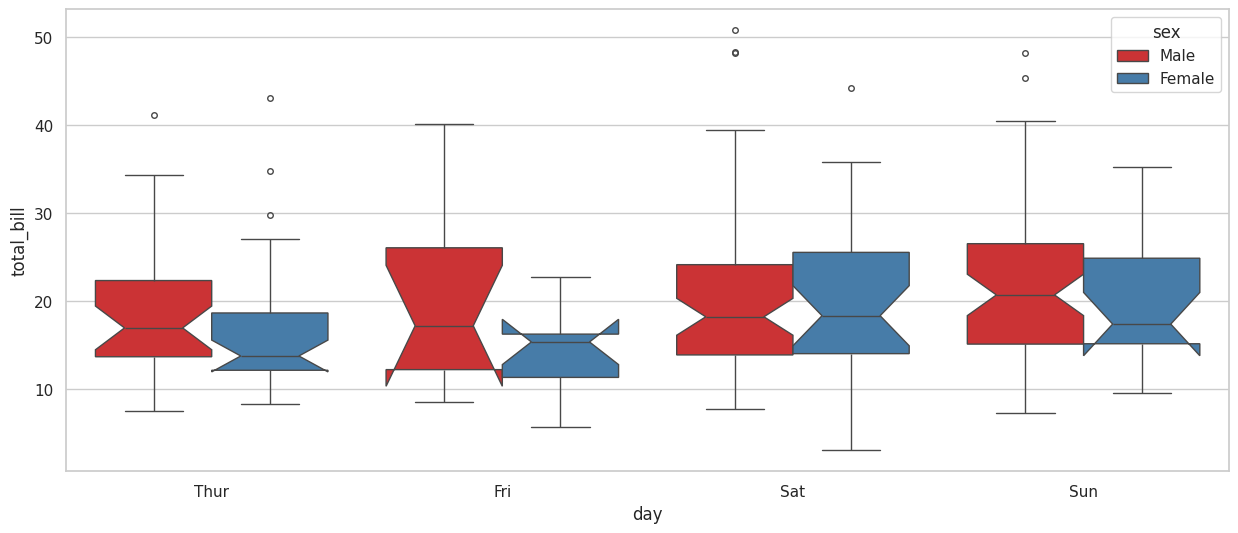

In [ ]:
plt.figure(figsize=(15, 6))

sns.boxplot(
    data=tips,                     # DataFrame с данными в "длинном" формате

    x="day",                       # Категориальная переменная по оси X (например, день недели)
    y="total_bill",                # Числовая переменная по оси Y (например, сумма счёта)
    hue="sex",                     # Дополнительная группировка внутри каждой категории (например, пол)

    order=["Thur", "Fri", "Sat", "Sun"],  # Порядок отображения категорий по оси X
    hue_order=["Male", "Female"],         # Порядок уровней внутри hue

    orient="v",                    # Ориентация: "v" — вертикально (по умолчанию), "h" — горизонтально

    color=None,                    # Цвет всех ящиков (игнорируется, если задан hue)
    palette="Set1",                # Цветовая палитра для групп (можно "deep", "muted", или словарь)
    saturation=0.75,               # Насыщенность цвета (0–1): 1 — полная, 0 — серый

    width=0.8,                     # Ширина ящиков (от 0 до 1)
    dodge=True,                    # Если True и есть hue — ящики смещаются бок о бок

    fliersize=4,                   # Размер точек-выбросов
    linewidth=None,                # Толщина линий контуров ящиков (None — автоматически)

    whis=1.5,                      # Коэффициент для определения выбросов:
                                   #   по умолчанию: [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
                                   #   можно передать процентили: whis=(5, 95)

    notch=True,                    # Добавить "выемку" вокруг медианы (доверительный интервал)
                                   # Полезно для сравнения медиан: если выемки не перекрываются — различие может быть значимым

    ax=None,                       # Оси matplotlib (None — использовать текущие или создать новые)

    # Дополнительные аргументы для matplotlib (пример):
    # showfliers=False,           # Скрыть выбросы (передаётся через **kwargs)
)


Треугольники в пятницу указывают на нестабильность оценки, признак неустойчивости оценки медианы из-за малой выборки или сильной изменчивости,  нужен дополнительный статистический тест.



Нулевая гипотеза (H₀): распределения сумм счётов у мужчин и женщин в пятницу одинаковы (в частности, медианы равны).
Альтернативная гипотеза (H₁): распределения отличаются (медианы не равны).

In [ ]:
from scipy.stats import mannwhitneyu

#  сравнение мужчин и женщин в пятницу
male_fri = tips[(tips['day'] == 'Fri') & (tips['sex'] == 'Male')]['total_bill']
female_fri = tips[(tips['day'] == 'Fri') & (tips['sex'] == 'Female')]['total_bill']

stat, p = mannwhitneyu(male_fri, female_fri)
print(f"p-value: {p:.3f}")

p-value: 0.369


`p-value = 0.369 > 0.05 ` - не отвергаем нулевую гипотезу

Это объясняет и треугольные выемки на box plot:
несмотря на то, что медиана у мужчин выглядит выше, разница не является статистически достоверной, скорее всего из-за:
малого размера выборки в пятницу (в датасете tips всего ~10–15 наблюдений на группу в Fri),
высокой изменчивости данных.
Таким образом, визуальное впечатление («мужчины тратят больше») не подтверждается статистически.

Посмотрим на ту же зависимость отдельно по двум группам, определяемых столбцом `smoker`, который передадим в аргумент `hue`. Для удобства сравнения результата между группами, их ящики рисуются рядом.

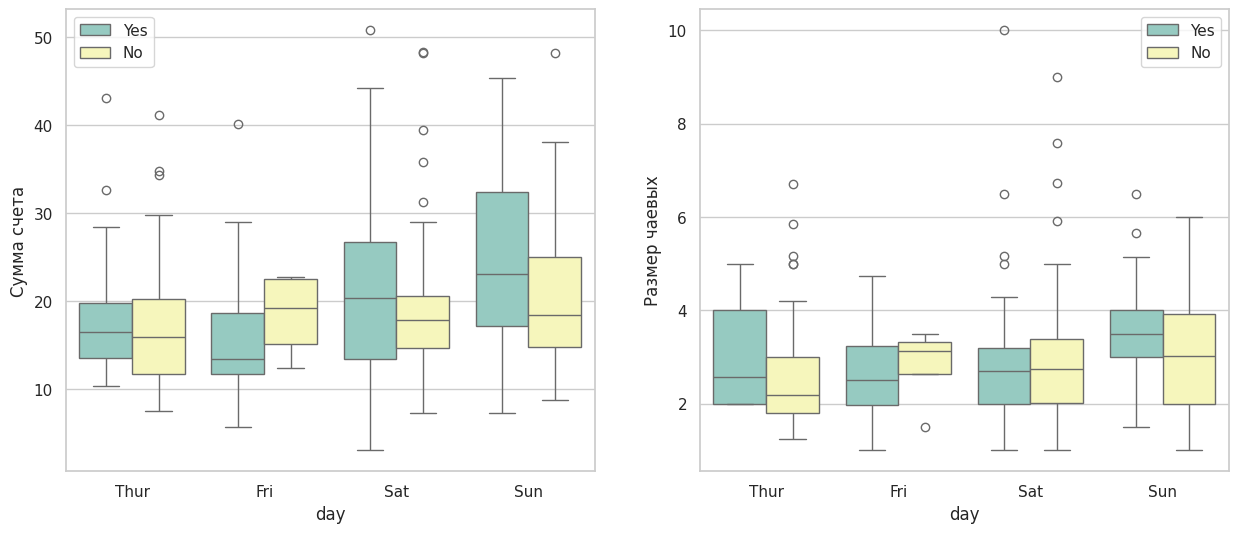

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='smoker',
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='smoker',
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');

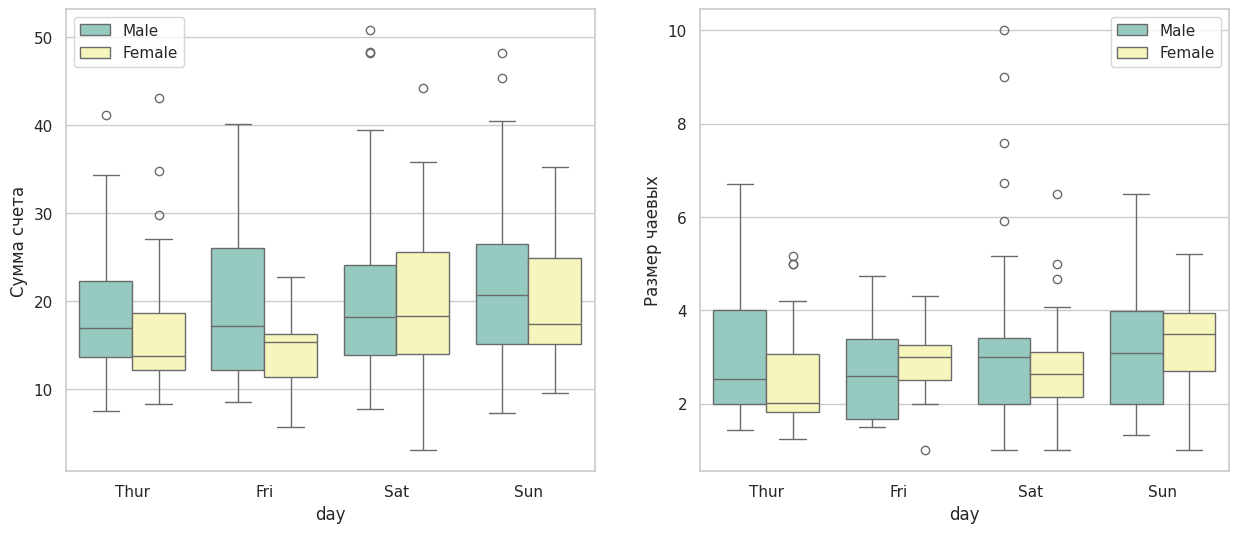

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
ax = sns.boxplot(x='day', y='total_bill', hue='sex',
                 data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Сумма счета')

plt.subplot(122)
ax = sns.boxplot(x='day', y='tip', hue='sex',
            data=tips, palette='Set3')
ax.legend().get_frame().set_facecolor("white")
plt.ylabel('Размер чаевых');

### Отступление

Сравните два графика. Какой выглядит лучше?

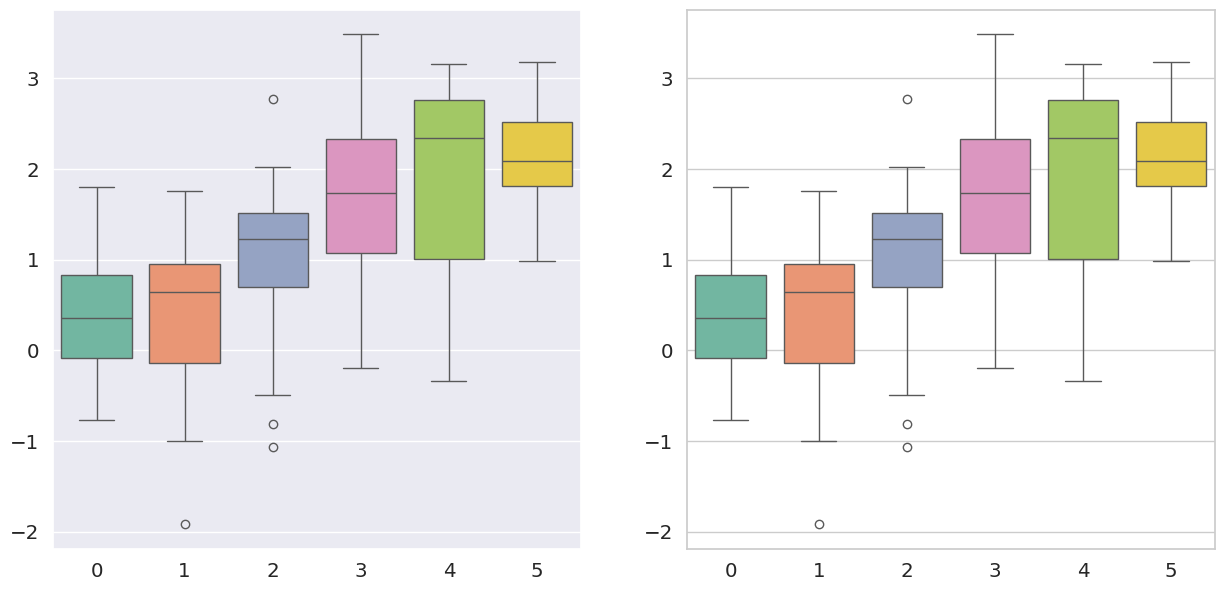

In [ ]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2
plt.figure(figsize=(15, 7))

with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(data=data, palette='Set2')

with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sns.boxplot(data=data, palette='Set2');

А из этих? В предположении, что необходима сетка, которая помогает при необходимости извлечения количественной информации из графика.

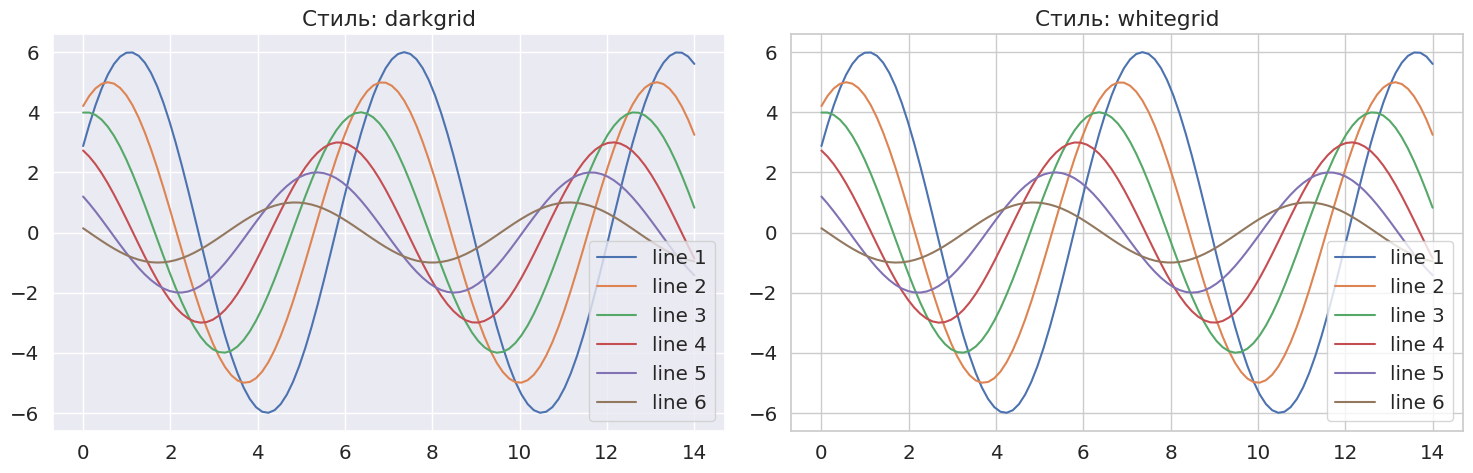

In [ ]:
# Генерируем данные (хотя они не используются в sinplot — возможно, вы хотели что-то другое?)
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

# Строим два подграфика с разными стилями
plt.figure(figsize=(15, 5))

# Левый график: тёмная сетка
with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.subplot(121)
    sinplot()
    plt.title("Стиль: darkgrid")

# Правый график: светлая сетка
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.subplot(122)
    sinplot()
    plt.title("Стиль: whitegrid")

plt.tight_layout()
plt.show()

-------------

* Тему `darkgrid` стоит применять для "легких" графиков (точки, линии), поскольку белый цвет сетки на сером фоне помогает избежать конфликта сетки с линиями, представляющими данные.
* Темы `white` и `whitegrid` похожи, но лучше подходят для графиков с "тяжелыми элементами" (например, закрашенные области).

-------------

### 5. Violin plot

Некоторая комбинация boxplot и ядерной оценки плотности. Внутри облака изображен обычный ящик с усами, только в сжатом виде и без выбросов. Форма облака соответствует ядерной оценке плотности.

`sns.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)`

* `x`, `y`, `hue` &mdash; одномерные данные или имена переменных из `data`;
* `data` &mdash; данные;
* `bw` &mdash; ширина ядра;
* `gridsize` &mdash; размер сетки для отрисовки ядерной оценки плотности;
* `orient`: `"v"` | `"h"` &mdash; ориентация (вертикальная или горизонтальая);
* `color` и `palette` &mdash; задают цвет.

------------------

Простой пример.

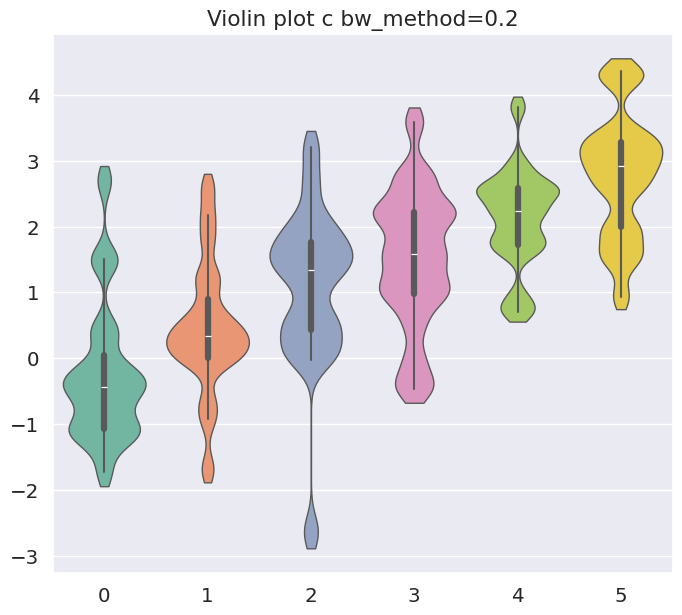

In [ ]:
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

# Строим violin plot с актуальными параметрами
plt.figure(figsize=(8, 7))
sns.violinplot(
    data=data,
    palette='Set2',
    bw_method=0.2,
    linewidth=1
)
plt.title("Violin plot с bw_method=0.2")
plt.show()

Более сложный пример: вместо двух boxplot-ов в примере с чаевыми можно построить один сдвоенный violinplot.

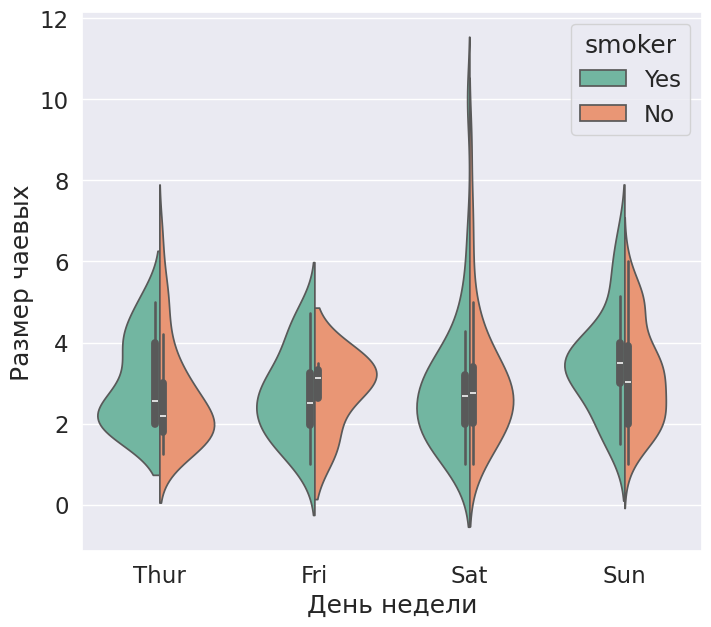

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5):

    plt.figure(figsize=(8, 7))
    sns.violinplot(x="day", y="tip", hue="smoker",
                   data=tips, palette="Set2", split=True)
    plt.ylabel('Размер чаевых')
    plt.xlabel('День недели')

### 6. PairGrid

Сетка графиков для визуализации попарных отношений в данных.

`class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)`

* `data` &mdash; данные;
* `hue` &mdash; категории, которые будут закрашиваться в разные цвета;
* `palette` &mdash; цветовая схема, может быть задана в виде словаря цветов;
* `height` &mdash; высота каждой грани (в дюймах).

Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию `func`, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а также параметры этой функции.

* `map(func, **kwargs)` &mdash; для каждой клетки применить `func`;
* `map_diag(func, **kwargs)` &mdash; для каждой клетки *на диагонали* применить `func`;
* `map_offdiag(func, **kwargs)` &mdash; для каждой клетки *вне диагонали* применить `func`;
* `map_lower(func, **kwargs)` &mdash; для каждой клетки *под диагональю* применить `func`;
* `map_upper(func, **kwargs)` &mdash; для каждой клетки *над диагональю* применить `func`.

-------------------

Визуализируем данные об ирисах Фишера.
* на диагонали расположим одномерные ядерные оценки плотности;
* под диагональю &mdash; двумерные;
* над диагональю изобразим сами точки.

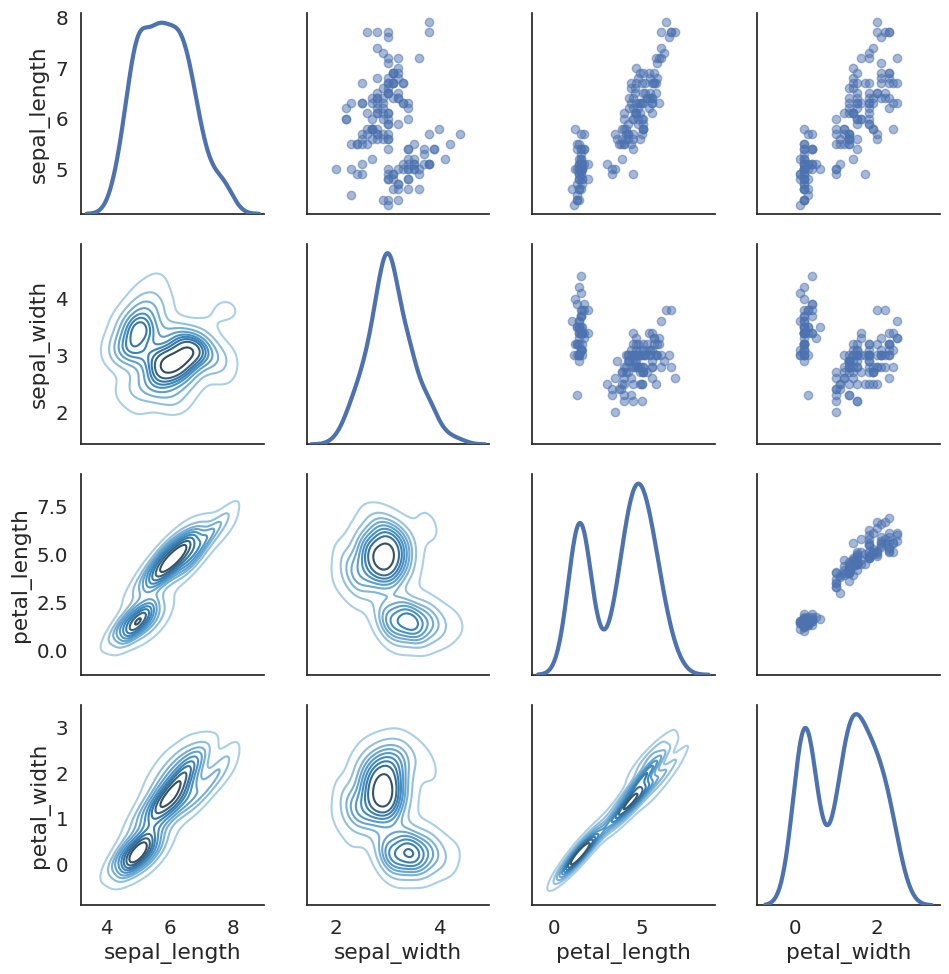

In [ ]:
sns.set(style='white', font_scale=1.3)

df = sns.load_dataset('iris')

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3);

Зададим классы с помощью параметра `hue`.

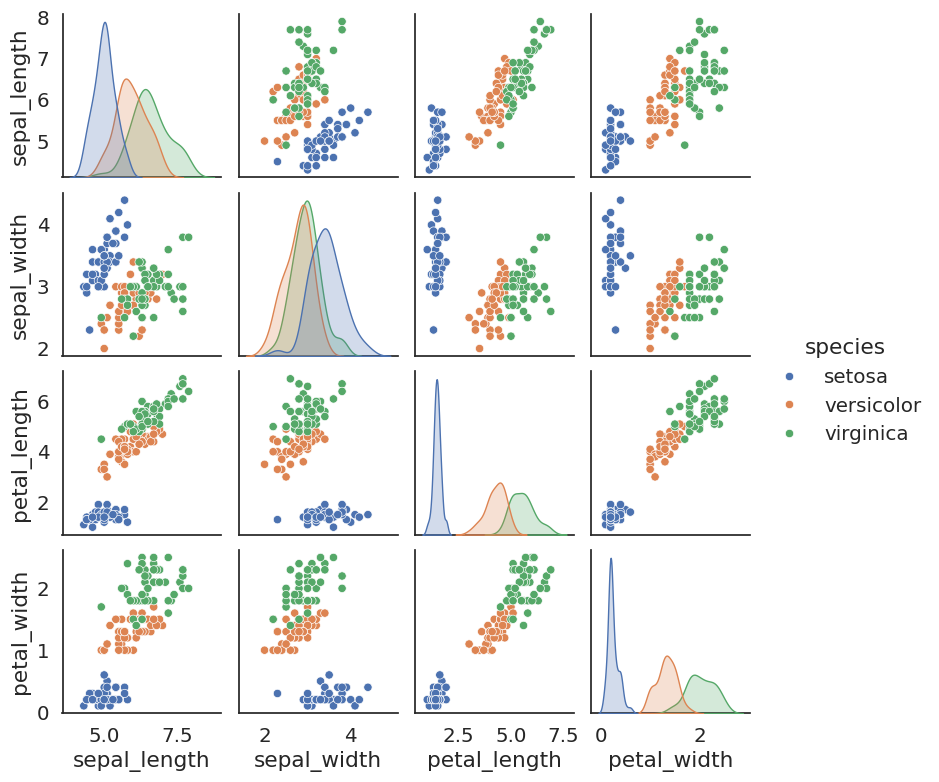

In [ ]:
sns.pairplot(df, hue='species', height=2)

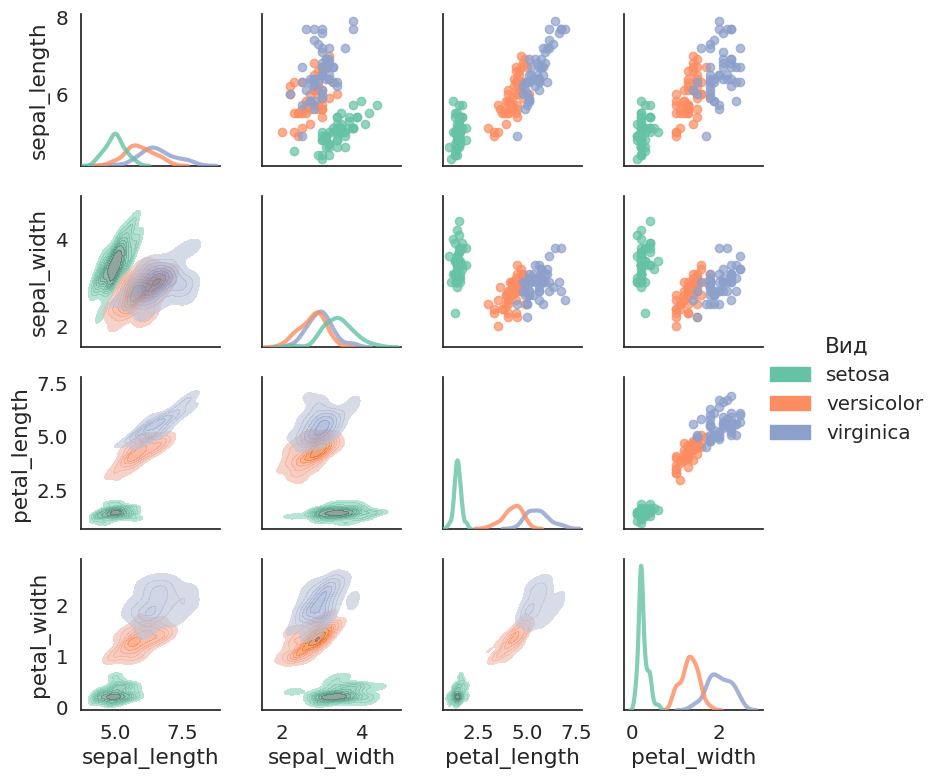

In [ ]:
g = sns.PairGrid(df, hue='species', palette='Set2', height=2)
g.map_upper(plt.scatter, alpha=0.7)
g.map_lower(sns.kdeplot, fill=True, alpha=0.6)
g.map_diag(sns.kdeplot, lw=3, alpha=0.8)

g.add_legend(title="Вид")
plt.show()

### 7. Heatmap

Визуализирует двумерную таблицу в виде тепловой карты.

`sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)`

* `data` &mdash; 2D-данные;
* `vmin` и `vmax` &mdash; минимальное и максимальное значения цветов;
* `cmap` &mdash; цветовая схема;
* `robust` &mdash; если не указаны `vmin` и `vmax`, то не используются выбросы при определении минимума и максимума;
* `annot` &mdash; в какие ячейки записывать данные;
* `fmt` &mdash; формат записи данных;
* `linewidths` &mdash; ширина линий между ячейками;
* `linecolor` &mdash; цвет линий между ячейками;
* `cbar` &mdash; рисовать ли colorbar.

Типичное применение — визуализация корреляции между признаками.

--------

Для примера загрузим данные о количестве пассажиров самолетов за каждый месяц с 1949 по 1960 года.

In [ ]:
flights_long = sns.load_dataset('flights')
flights_long.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Двумерную таблицу месяц-год создадим с помощью `pivot_table`.

In [ ]:
flights = flights_long.pivot_table(index='month',
                                   columns='year',
                                   values='passengers')
flights

/tmp/ipython-input-1902462892.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = flights_long.pivot_table(index='month',


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


Визуализируем ее с помощью `heatmap`, что более наглядно, чем просто смотреть на числа в таблице выше.

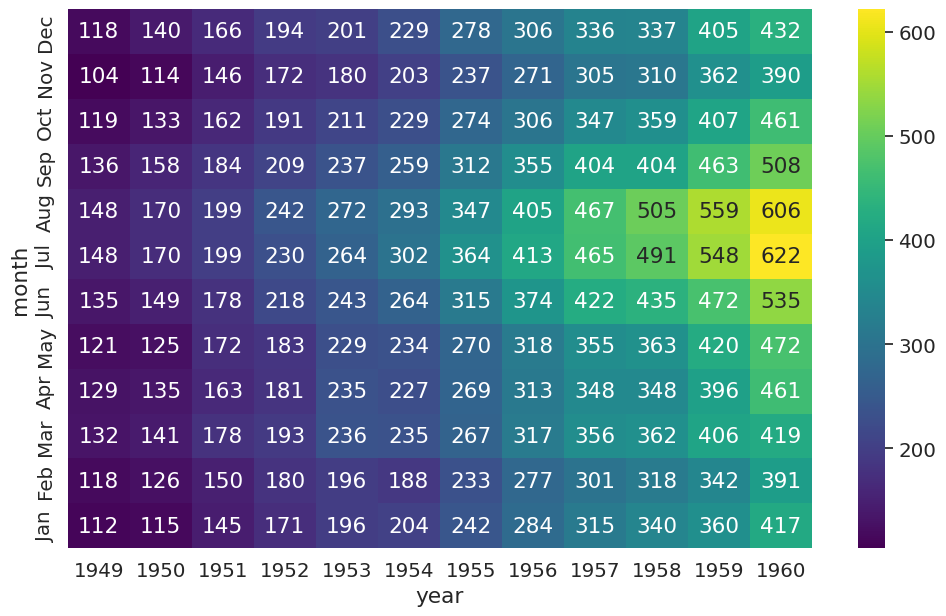

In [ ]:
flights = flights.astype(int)

# Строим heatmap
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(flights, annot=True, fmt='d', ax=ax, cmap="viridis")
plt.ylim(0, 12)
plt.show()

**Замечание:** `sns.heatmap` может работать с NaN, если не использовать annot=True — NaN просто отображаются как пустые (белые) клетки.

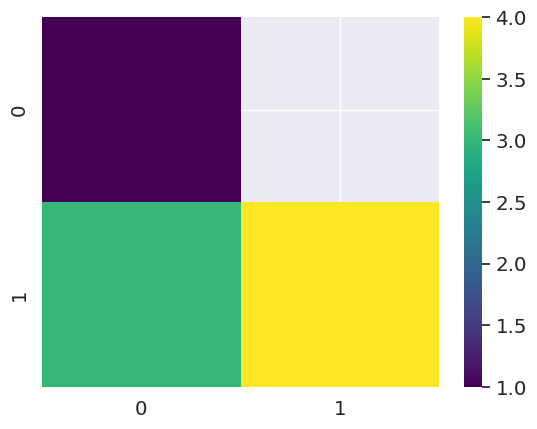

In [ ]:
data = np.array([[1., np.nan],
                 [3., 4.]])

sns.heatmap(data, cmap="viridis")
plt.show()

### 8. Clustermap

Аналог `sns.heatmap`, который автоматически группирует похожие строки и/или столбцы таблицы.  Бывает очень полезно в тех случаях, когда нужно найти структуру в данных — скажем, разбить объекты на группы.  
Пример из медицинской практики: разделить клетки опухоли на **клональные линии** — клетки, получившиеся неконтролируемым делением одной родительской раковой клетки, на основании таблицы генетических мутаций, где каждой клетке — свой столбец.

`seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)`

У функции очень много технических параметров, так что рассмотрим только основные из тех, которых нет среди параметров heatmap:

* `data` &mdash; 2D-данные;
* `row_cluster`, `col_cluster` — группировать ли строки или столбцы соотв-но;
* `row_colors`, `col_colors` — цветовые метки отдельных строк и столбцов (позволяет следить за их порядком);
* `method` &mdash; метод группировки (см. документацию к [иерархической кластеризации в scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html));
* `mask` — позволяет указать, какие значения в таблице не показывать (по умолчанию скрываются только пропуски);
* `z_score` — привести ли все строки (если 0) или столбцы (если 1) к одному масштабу (`(x - mean(x)) / std(x)`);
* `standard_scale` — перевести ли все строки (если 0) или столбцы (если 1) в диапазон [0, 1] (`(x - min(x)) / (max(x) - min(x))`);

--------

Для примера загрузим встроенный в seaborn датасет `brain_networks`, любезно предоставленный автором библиотеки.  В примере похожие участки мозга объединяются в группы по корреляции профилей их активности

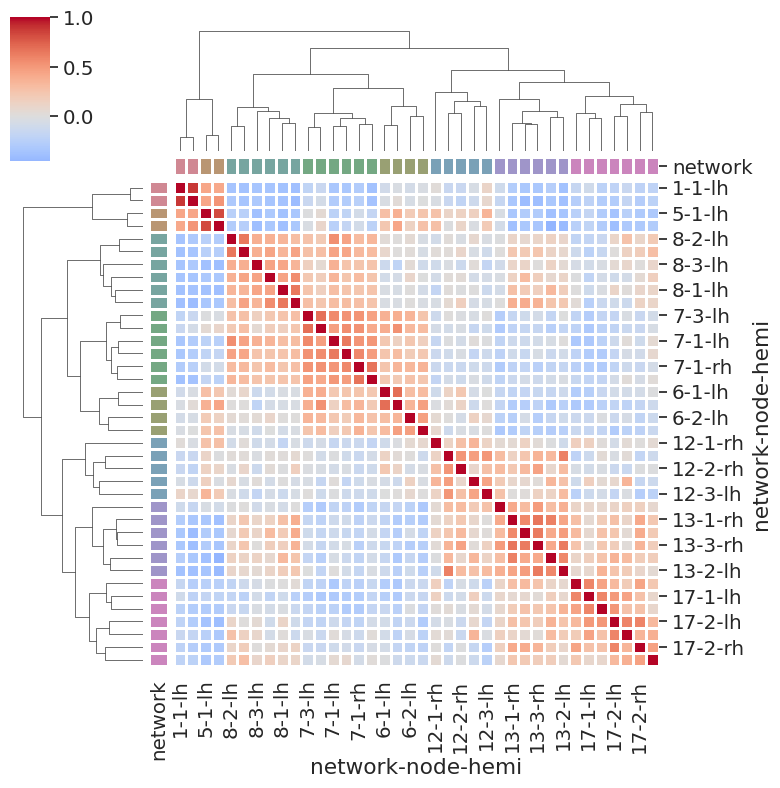

In [ ]:
data = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# выберем подмножество отделов мозга
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (data.columns.get_level_values("network")
                            .astype(int)
                            .isin(used_networks))
data = data.loc[:, used_columns]

# создадим для них категориальную палитру
network_pal = sns.husl_palette(len(used_networks), s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# окрасим строки и столбцы в соответствии с отделом
networks = data.columns.get_level_values("network")
network_colors = pd.Series(networks, index=data.columns).map(network_lut)

# нарисуем график корреляции паттернов активности участков мозга
# и убедимся, что участки из одного отдела попадают в одну группу
# после иерархической кластеризации
sns.clustermap(data.corr(), center=0, cmap="coolwarm",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(8, 8));

### 9. Jointplot

График двух переменных, соединяющий функции 1D и 2D графиков.

`sns.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)`

* `x`, `y` &mdash; данные или имена переменных в `data`;
* `data` &mdash; данные;
* `kind` : { `"scatter"` | `"reg"` | `"resid"` | `"kde"` | `"hex"` } &mdash; тип графика (точки, регрессия, остатки регрессии, ядерная оценка плотности, гексаэдры);
* `stat_func` &mdash; функция-критерий, который возвращает статистику и pvalue. По умолчанию критерий для проверки некоррелированности на основе коэффициента корреляции Пирсона;
* `color` &mdash; цвет;
* `height` &mdash; размер фигуры;
* `dropna` &mdash; удаление пропущенных значений;
* `xlim`, `ylim` &mdash; ограничения по осям.

----------------

Сгенерируем выборку из двумерного нормального распределения.

In [ ]:
x, y = sps.multivariate_normal(cov=[[2, 1], [1, 2]]).rvs(size=200).T

Визуализируем двумерную оценку плотности и две одномерных.

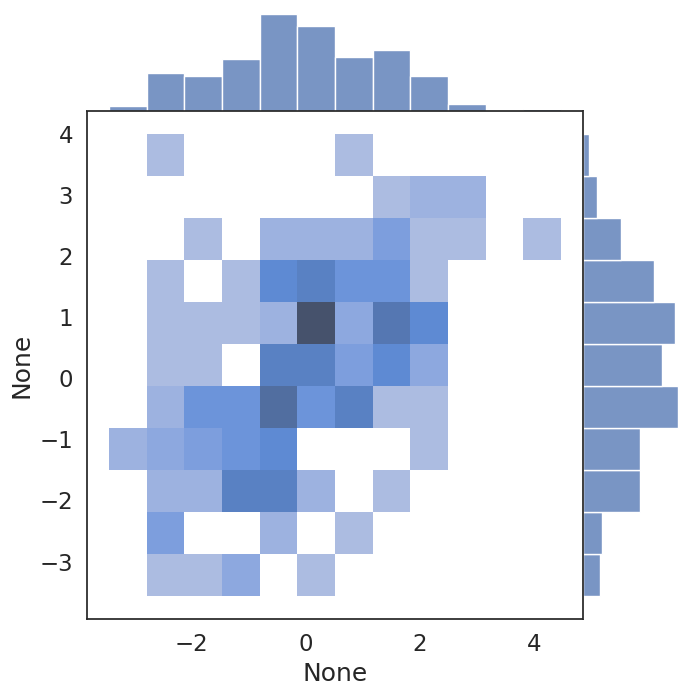

In [ ]:
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind='hist', height=7, space=0)

Отметим, что `sns.jointplot` можно конфигурировать вручную!  У объекта `JointGrid`, который эта функция возвращает, можно настраивать все три части графика:
- `ax_marg_x` — верхний график;
- `ax_marg_y` — правый график;
- `ax_joint` — центральный график;  

На них можно отрисовать что угодно, в том числе вещи, совершенно не связанные с исходными данными. Но если хочется построить другой график на тех же данных, то на выручку приходят функции `plot_joint` и `plot_marginals`

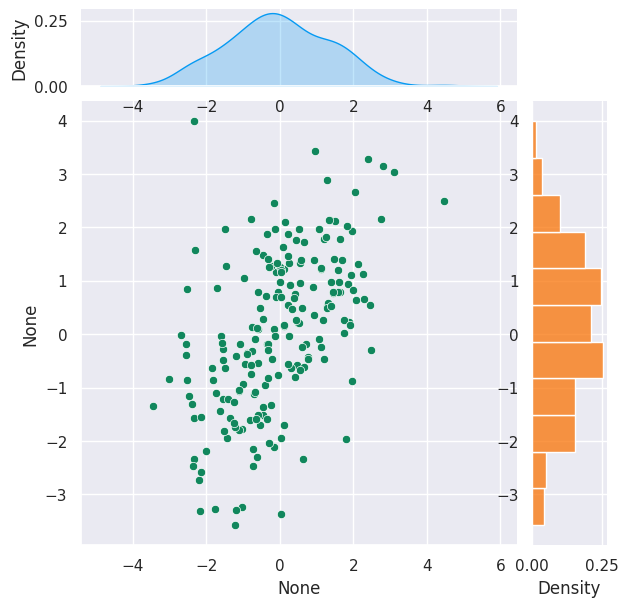

In [ ]:
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):

    # Центральный график — передаём x и y как ИМЕНОВАННЫЕ аргументы
    graph = sns.jointplot(x=x, y=y, color="xkcd:dark sea green")

    # Верхний график: KDE с заполнением
    graph.ax_marg_x.clear()
    sns.kdeplot(x=x, fill=True, color="xkcd:azure", ax=graph.ax_marg_x)

    # Правый график: гистограмма (вместо distplot!)
    graph.ax_marg_y.clear()
    sns.histplot(y=y, stat="density", color="xkcd:orange", ax=graph.ax_marg_y, orientation="horizontal")